In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
def check_digit(x):
    if x.isdigit():
        return int(x)
    else:
        return 0

# read data
yt = pd.read_csv('data.csv')

# clean up data
yt.drop('Channel name',1,inplace=True)
yt['Grade'] = yt['Grade'].str.strip()
yt['Video Uploads'] = yt['Video Uploads'].apply(check_digit)
yt['Subscribers'] = yt['Subscribers'].apply(check_digit)
yt = yt[(yt['Subscribers'] != 0) & (yt['Video Uploads'] != 0)]
yt = yt[(yt['Grade'] == 'A++') | 
        (yt['Grade'] == 'A+') | 
        (yt['Grade'] == 'A') | 
        (yt['Grade'] == 'A-') | 
        (yt['Grade'] == 'B+')]
yt.head()

,Rank,Grade,Video Uploads,Subscribers,Video views
0,1st,A++,82757,18752951,20869786591
1,2nd,A++,12661,61196302,47548839843
2,3rd,A++,373,19238251,9793305082
3,4th,A++,27323,31180559,22675948293
4,5th,A++,36756,32852346,26273668433


In [3]:
yt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4610 entries, 0 to 4999
Data columns (total 5 columns):
Rank             4610 non-null object
Grade            4610 non-null object
Video Uploads    4610 non-null int64
Subscribers      4610 non-null int64
Video views      4610 non-null int64
dtypes: int64(3), object(2)
memory usage: 216.1+ KB


In [4]:
yt.describe()

,Video Uploads,Subscribers,Video views
count,4610.000000,4.610000e+03,4.610000e+03
mean,4085.745987,2.621527e+06,1.138403e+09
std,17726.160260,3.927263e+06,2.068706e+09
min,1.000000,3.010000e+02,7.500000e+01
25%,148.000000,6.101925e+05,2.189184e+08
50%,464.000000,1.350884e+06,5.368886e+08
75%,1592.500000,2.950921e+06,1.195115e+09
max,422326.000000,6.599531e+07,4.754884e+10


In [5]:
yt.Grade.value_counts()

B+     2722
A-      941
A       897
A+       40
A++      10
Name: Grade, dtype: int64

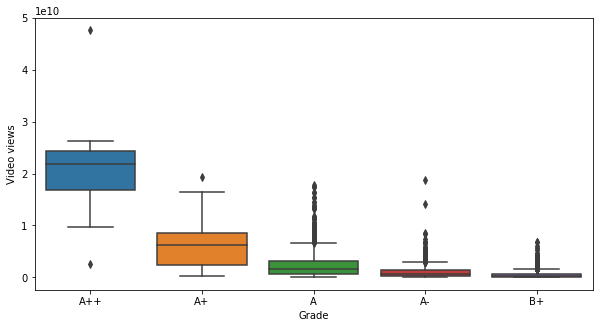

In [6]:
# noticed outlier value for A++
plt.figure(figsize=(10,5))
sns.boxplot(x='Grade', y='Video views', data=yt)

In [7]:
# remove outlier
yt = yt[yt['Video views'] < 30000000000]

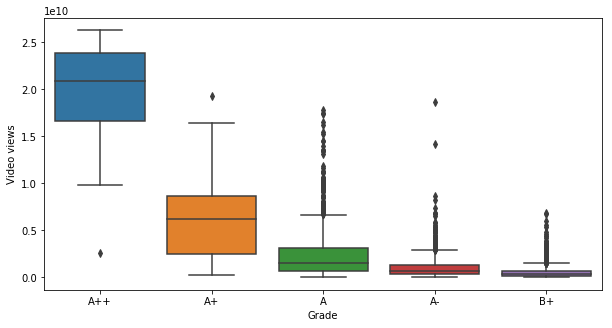

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Grade', y='Video views', data=yt)

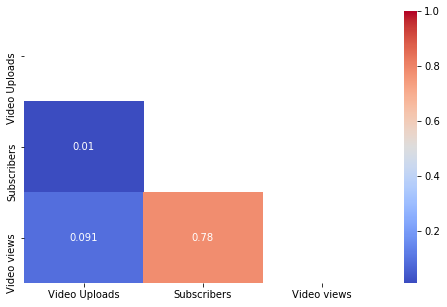

In [9]:
# subscribers matter more than uploads (with regards to views)
mask = np.zeros_like(yt.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8,5))
sns.heatmap(yt.corr(), cmap='coolwarm', annot=True, mask=mask)

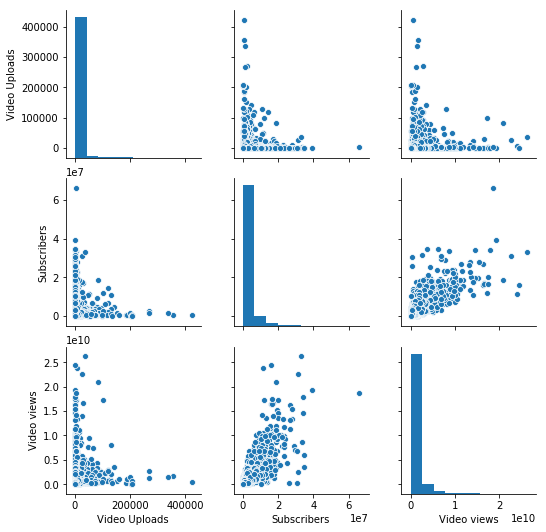

In [10]:
# subscribers and video views show positive correlation
# use linear regression model between subscribers and video views
sns.pairplot(yt)

### Linear Regression Model

In [12]:
X = yt[['Video Uploads','Subscribers']]
y = yt['Video views']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [14]:
lm = LinearRegression()
lm.fit(X_train, y_train)

In [16]:
lm.intercept_

92788524.76129329

In [19]:
cdf = pd.DataFrame(lm.coef_, X_train.columns, columns=['Coeff'])
cdf

### Prediction

In [21]:
prediction = lm.predict(X_test)

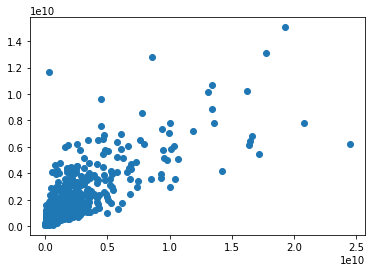

In [24]:
plt.scatter(y_test, prediction)

C:\Users\jwcn9\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


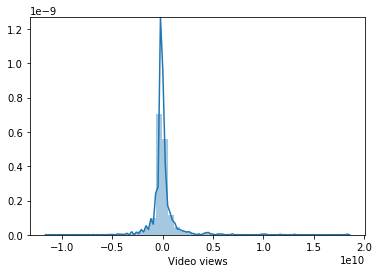

In [25]:
sns.distplot((y_test-prediction))

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 597711470.5000203
MSE: 1.7509029587950572e+18
RMSE: 1323216897.8648427
